![](https://github.com/IntelRealSense/librealsense/raw/master/doc/img/realsense.png)


## Introduction

The notebook offers a quick hands-on introduction to Intel RealSense Depth-Sensing technology. 

> **Have a Question?** [Open new issue on our GitHub](https://github.com/IntelRealSense/librealsense/issues/new)

## The Tools
We are planning to use the following packages:

In [ ]:
import cv2                                # state of the art computer vision algorithms library
import numpy as np                        # fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
from pyntcloud import PyntCloud # open source library for 3D pointcloud visualisation
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
print("Environment Ready")

## The API
Next, we will open depth and RGB streams from pre-recorded file and capture a set of frames:


In [ ]:
# Setup:
pipe = rs.pipeline()
cfg = rs.config()
cfg.enable_device_from_file("../../bags/object_detection.bag")
profile = pipe.start(cfg)

# Skip 5 first frames to give the Auto-Exposure time to adjust
for x in range(5):
  pipe.wait_for_frames()
  
# Store next frameset for later processing:
frameset = pipe.wait_for_frames()
color_frame = frameset.get_color_frame()
depth_frame = frameset.get_depth_frame()

# Cleanup:
pipe.stop()
print("Frames Captured")

## RGB Data
Let's start with accessing the color componnent of the frameset:

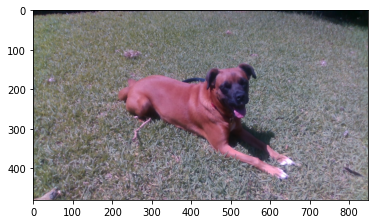

In [5]:
color = np.asanyarray(color_frame.get_data())
plt.rcParams["axes.grid"] = False
plt.imshow(color)

## Depth Data
Now, we will visualize the depth map captured by the RealSense camera:

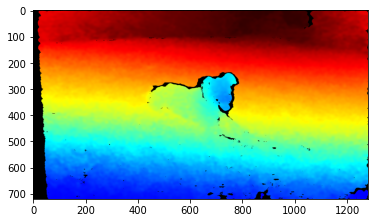

In [6]:
colorizer = rs.colorizer()
colorized_depth = np.asanyarray(colorizer.colorize(depth_frame).get_data())
plt.imshow(colorized_depth)

## Point-Cloud

The SDK provides `pointcloud` primitive that can convert RGB-D image data into 3D point-cloud (a set of {X,Y,Z}) values. This cloud can be exported into PLY and rendered using various tools.

In [7]:
pc = rs.pointcloud();
pc.map_to(color_frame);
pointcloud = pc.calculate(depth_frame);
pointcloud.export_to_ply("1.ply", color_frame);
cloud = PyntCloud.from_file("1.ply");
cloud.plot()

KeyboardInterrupt: 

> **Want to learn more?** Visit [realsense.intel.com](http://realsense.intel.com) and [github.com/IntelRealSense](http://www.github.com/IntelRealSense/librealsense)